<a href="https://colab.research.google.com/github/ShakhovaP/musical-chord-recognition/blob/main/RNN_mfccs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import numpy as np
from   sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
from google.colab import files

In [12]:
files.upload()


{}

In [3]:
DATASET_PATH = '/content/gdrive/MyDrive/alldata-mfcc40.json'

labels = [
    "A",
    "A#m|Bbm",
    "A#|Bb",
    "Am",
    "B",
    "B#|Cb",
    "Bm",
    "C",
    "C#m|Dbm",
    "C#|Db",
    "Cm",
    "D",
    "D#m|Ebm",
    "D#|Eb",
    "Dm",
    "E",
    "E#m|Fbm",
    "E#|Fb",
    "Em",
    "F",
    "F#m|Gbm",
    "F#|Gb",
    "Fm",
    "G",
    "G#m|Abm",
    "G#|Ab",
    "Gm",
    "N",
]

In [5]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data

        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["chords"])
    return X, y




def plot_history(history):
    """Plots accuracy/loss for train and validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


    
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATASET_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)



    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [8]:
def build_model(input_shape):
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(32))
    

    # dense layer
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(28, activation='softmax'))

    return model

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(9, 40)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 9, 64)             26880     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                924       
                                                                 
Total params: 41,276
T

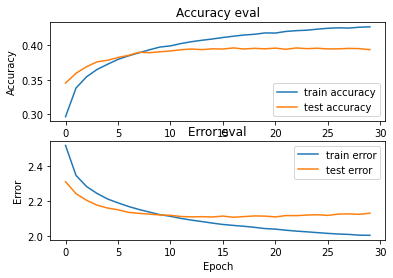

3715/3715 - 15s - loss: 2.1256 - accuracy: 0.3961 - 15s/epoch - 4ms/step

Test accuracy: 0.3960995674133301


In [9]:
if __name__ == "__main__":
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.3, 0.2)

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train = (X_train - mean) / std

    mean = np.mean(X_validation, axis=0)
    std = np.std(X_validation, axis=0)
    X_validation = (X_validation - mean) / std

    mean = np.mean(X_test, axis=0)
    std = np.std(X_test, axis=0)
    X_test = (X_test - mean) / std

    n_classes = 28
    y_train = keras.utils.to_categorical(y_train, n_classes)
    print(y_train)
    y_validation = keras.utils.to_categorical(y_validation, n_classes)
    y_test = keras.utils.to_categorical(y_test, n_classes)


    # create network
    input_shape = (X_train.shape[1], X_train.shape[2])
    print(input_shape)
    model = build_model(input_shape)

    # compile model
    
    
    
    model.compile(optimizer="adam",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],
                  )

    model.summary()

   

    # train model
    history = model.fit(X_train,
                        y_train,
                        validation_data=(X_validation, y_validation),
                        batch_size=64,
                        epochs = 30,
                        callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=20, verbose = 1)])
                       

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)


    

# New Section